In [ ]:
# Import the packages
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Define function which will compute and return the function value 
def evalf(x):  
  assert type(x) is np.ndarray and len(x) == 2
  return (512*(x[1]-x[0]**2)**2 + (4-x[0])**2)

In [ ]:
# Define the function which will compute and return the gradient value as an array 
def evalg(x):  
  assert type(x) is np.ndarray and len(x) == 2 
  return np.array([2048*x[0]*(x[0]**2-x[1])+2*(x[0]-4), 1024*(x[1]-x[0]**2)])

In [ ]:
# Compute the steplength by using the backtracking line search

def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(x) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2
  
  alpha = alpha_start
  pk = -gradf
  while evalf(np.add(x, alpha*pk)) > np.add(evalf(x), gamma*alpha*np.dot(gradf.T,pk)):
      alpha = rho*alpha

  return alpha

In [ ]:
# Define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [ ]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2    #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
 
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    # print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(x, g_x, A, b) #call the new function you wrote to compute the steplength
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, k, evalf(x) 


Code for answer 5

In [ ]:
# Input arguments
my_start_x = np.array([3.9999,15.9999])
my_tol= 1e-6

alpha = [1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]

x_opt_alpha = [0 for _ in range(9)]
iter_alpha  = [0 for _ in range(9)]
f_opt_alpha = [0 for _ in range(9)]
print("Alpha \t Minimizer \t Minimum function value \t No of iterations")

for i in range(9):
    x_opt_alpha[i] , iter_alpha[i] , f_opt_alpha[i] = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha[i], 0.5, 0.5)
    print(alpha[i],"\t", x_opt_alpha[i], "\t", f_opt_alpha[i], "\t", iter_alpha[i])

Alpha 	 Minimizer 	 Minimum function value 	 No of iterations
1 	 [ 3.99999598 15.99996782] 	 1.617781791676639e-11 	 69793
0.9 	 [ 3.99999599 15.99996791] 	 1.609218904886577e-11 	 200736
0.75 	 [ 3.99999617 15.99996938] 	 1.4648281561171663e-11 	 1126772
0.6 	 [ 3.99999604 15.9999683 ] 	 1.570352990885336e-11 	 563211
0.5 	 [ 3.99999598 15.99996782] 	 1.617781791676639e-11 	 69793
0.4 	 [ 3.99999608 15.99996865] 	 1.5354911664979166e-11 	 808868
0.25 	 [ 3.99999598 15.99996782] 	 1.617781791676639e-11 	 69793
0.1 	 [ 3.99999608 15.99996865] 	 1.5354911664979166e-11 	 808868
0.01 	 [ 3.99999608 15.99996862] 	 1.5381393080588523e-11 	 766907


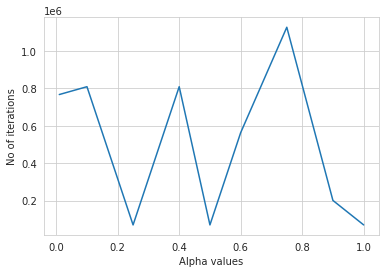

In [ ]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(alpha, iter_alpha)
plt.ylabel('No of iterations')
plt.xlabel('Alpha values')
plt.show()

Code for answer 6

In [ ]:
# Input arguments
my_start_x = np.array([3.9999,15.9999])
my_tol= 1e-6

rho = [0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

x_opt_rho = [0 for _ in range(8)]
iter_rho  = [0 for _ in range(8)]
f_opt_rho = [0 for _ in range(8)]
print("Rho \t Minimizer \t Minimum function value \t No of iterations")

for i in range(8):
    x_opt_rho[i] , iter_rho[i] , f_opt_rho[i] = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, rho[i], 0.5)
    print(rho[i],"\t", x_opt_rho[i], "\t", f_opt_rho[i], "\t", iter_rho[i])

Rho 	 Minimizer 	 Minimum function value 	 No of iterations
0.9 	 [ 3.99999599 15.99996795] 	 1.6047934611077876e-11 	 210606
0.75 	 [ 3.99999609 15.9999687 ] 	 1.530556601286887e-11 	 486527
0.6 	 [ 3.99999604 15.99996832] 	 1.5678781211646178e-11 	 530687
0.5 	 [ 3.99999598 15.99996782] 	 1.617781791676639e-11 	 69793
0.4 	 [ 3.99999603 15.99996822] 	 1.5777209281009614e-11 	 443946
0.25 	 [ 3.99999598 15.99996785] 	 1.61466538344678e-11 	 76999
0.1 	 [ 3.99999601 15.99996808] 	 1.5923710536673803e-11 	 901343
0.01 	 [ 3.99999625 15.99996999] 	 1.4073454044687032e-11 	 8869799


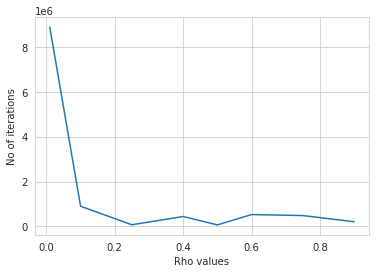

In [ ]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(rho, iter_rho)
plt.ylabel('No of iterations')
plt.xlabel('Rho values')
plt.show()

Answer 1) Minimizer = [4, 16] and minimum function value = 0.

Answer 2) No, we cannot use exact line search idea to find a closed form expression for optimal value of $\eta$ because $q(\textbf{x}+\eta\textbf{p})$ is a vector, and the gradient of this expression when equated to zero i.e. $\frac{d q(\textbf{x}+\eta\textbf{p})}{d\alpha} = 0$ would yield terms of $\eta$ having powers ranging from 0 to 3. Hence, we cannot find an explicit form for $\eta$ which can be manipulated to find the final answer. Another way to say this is that we will not get any solution of the form $g(\textbf{x}) = \eta h(\textbf{x})$ for some $g$ and $h$, and hence cannot find a closed form expression for $\eta$.

Answer 5) We can observe a sort of zig zag pattern and the no of iterations varies randomly with change in alpha values. Minimizer remains almost same and close to [4, 16]. Minimum functional value is close to zero in all cases. 


Alpha 	 Minimizer 	 Minimum function value 	 No of iterations

1 	 [ 3.99999598 15.99996782] 	 1.617781791676639e-11 	 69793

0.9 	 [ 3.99999599 15.99996791] 	 1.609218904886577e-11 	 200736

0.75 	 [ 3.99999617 15.99996938] 	 1.4648281561171663e-11 	 1126772

0.6 	 [ 3.99999604 15.9999683 ] 	 1.570352990885336e-11 	 563211

0.5 	 [ 3.99999598 15.99996782] 	 1.617781791676639e-11 	 69793

0.4 	 [ 3.99999608 15.99996865] 	 1.5354911664979166e-11 	 808868

0.25 	 [ 3.99999598 15.99996782] 	 1.617781791676639e-11 	 69793

0.1 	 [ 3.99999608 15.99996865] 	 1.5354911664979166e-11 	 808868

0.01 	 [ 3.99999608 15.99996862] 	 1.5381393080588523e-11 	 766907

Answer 6) We can observe a steep decrease then slight zig zag pattern and the no of iterations varies randomly with increase in rho values. Minimizer remains almost same and close to [4, 16]. Minimum functional value is close to zero in all cases. 


Rho 	 Minimizer 	 Minimum function value 	 No of iterations

0.9 	 [ 3.99999599 15.99996795] 	 1.6047934611077876e-11 	 210606

0.75 	 [ 3.99999609 15.9999687 ] 	 1.530556601286887e-11 	 486527

0.6 	 [ 3.99999604 15.99996832] 	 1.5678781211646178e-11 	 530687

0.5 	 [ 3.99999598 15.99996782] 	 1.617781791676639e-11 	 69793

0.4 	 [ 3.99999603 15.99996822] 	 1.5777209281009614e-11 	 443946

0.25 	 [ 3.99999598 15.99996785] 	 1.61466538344678e-11 	 76999

0.1 	 [ 3.99999601 15.99996808] 	 1.5923710536673803e-11 	 901343

0.01 	 [ 3.99999625 15.99996999] 	 1.4073454044687032e-11 	 8869799

I had taken starting point to be [100,100] and tolerance value to be 10^(-10) but it was taking a long time so I set [3.9999, 15.9999] to be the starting point. It was still taking a long time so I checked with tolerance values 10^(-9), 10^(-7) and 10^(-5) and found out that the graphs were almost similar ( checked for 10^(-5) ) and the minimizer was close to [4,16] and minimum function value was close to 0 in all cases.

For tolerance level =10^(-5)

Code for answer 5

In [29]:
# Input arguments
my_start_x = np.array([3.9999,15.9999])
my_tol= 1e-5

alpha = [1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]

x_opt_alpha = [0 for _ in range(9)]
iter_alpha  = [0 for _ in range(9)]
f_opt_alpha = [0 for _ in range(9)]
print("Alpha \t Minimizer \t Minimum function value \t No of iterations")

for i in range(9):
    x_opt_alpha[i] , iter_alpha[i] , f_opt_alpha[i] = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha[i], 0.5, 0.5)
    print(alpha[i],"\t", x_opt_alpha[i], "\t", f_opt_alpha[i], "\t", iter_alpha[i])

Alpha 	 Minimizer 	 Minimum function value 	 No of iterations
1 	 [ 3.99998615 15.99988923] 	 1.917087121363959e-10 	 19
0.9 	 [ 3.99998615 15.99988923] 	 1.9170977847832145e-10 	 6
0.75 	 [ 3.99998615 15.99988923] 	 1.917093575244371e-10 	 10
0.6 	 [ 3.99998615 15.99988923] 	 1.917090722049273e-10 	 15
0.5 	 [ 3.99998615 15.99988923] 	 1.917087121363959e-10 	 19
0.4 	 [ 3.99998615 15.99988923] 	 1.9171008034567841e-10 	 8
0.25 	 [ 3.99998615 15.99988923] 	 1.917087121363959e-10 	 19
0.1 	 [ 3.99998615 15.99988923] 	 1.9171008034567841e-10 	 8
0.01 	 [ 3.99998615 15.99988923] 	 1.9170942047199322e-10 	 13


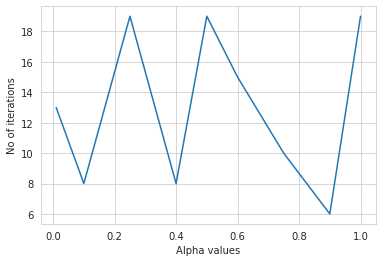

In [30]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(alpha, iter_alpha)
plt.ylabel('No of iterations')
plt.xlabel('Alpha values')
plt.show()

Code for answer 6

In [31]:
# Input arguments
my_start_x = np.array([3.9999,15.9999])
my_tol= 1e-5

rho = [0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

x_opt_rho = [0 for _ in range(8)]
iter_rho  = [0 for _ in range(8)]
f_opt_rho = [0 for _ in range(8)]
print("Rho \t Minimizer \t Minimum function value \t No of iterations")

for i in range(8):
    x_opt_rho[i] , iter_rho[i] , f_opt_rho[i] = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, rho[i], 0.5)
    print(rho[i],"\t", x_opt_rho[i], "\t", f_opt_rho[i], "\t", iter_rho[i])

Rho 	 Minimizer 	 Minimum function value 	 No of iterations
0.9 	 [ 3.99998615 15.99988923] 	 1.9171005788171325e-10 	 5
0.75 	 [ 3.99998615 15.99988923] 	 1.9171034395649766e-10 	 6
0.6 	 [ 3.99998615 15.99988923] 	 1.917096488380682e-10 	 7
0.5 	 [ 3.99998615 15.99988923] 	 1.917087121363959e-10 	 19
0.4 	 [ 3.99998615 15.99988923] 	 1.9170904685336624e-10 	 23
0.25 	 [ 3.99998615 15.99988923] 	 1.9170836585509944e-10 	 43
0.1 	 [ 3.99998615 15.99988923] 	 1.9170914789434115e-10 	 13
0.01 	 [ 3.99998615 15.99988923] 	 1.9170872269749924e-10 	 194


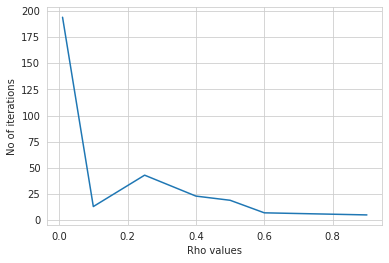

In [32]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(rho, iter_rho)
plt.ylabel('No of iterations')
plt.xlabel('Rho values')
plt.show()